In [1]:
## path for mdules

import xarray as xr
import sys
sys.path.insert(0,"/home/albert/lib/python")

import numpy as np
sys.path.insert(0,"/home/albert/Work/git/xscale")
import xscale
import xscale.spectral.fft as xfft
from matplotlib.colors import LogNorm
import cmocean
import matplotlib.pylab as plt

sys.path.insert(0,"/home/albert/lib/python/w_k_scripts")
import Wavenum_freq_spec_func as wfs

/home/albert/anaconda2/lib/python2.7/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [2]:
## Dataset

dirtideJFM="/mnt/albert/equipes/IGE/meom//workdir/albert/eNATL60/eNATL60-BLBT01-S/1h/ACO/"
dirnotideJFM="/mnt/albert/equipes/IGE/meom//workdir/albert/eNATL60/eNATL60-BLB001-S/1h/ACO/"
dirtideJAS="/mnt/albert/equipes/IGE/meom//workdir/albert/eNATL60/eNATL60-BLBT02-S/1h/ACO/"
dirnotideJAS="/mnt/albert/equipes/IGE/meom//workdir/albert/eNATL60/eNATL60-BLB002-S/1h/ACO/"



In [3]:
filesJFMUtide="eNATL60ACO-BLBT01_1h_*_gridU*.nc"
filesJFMVtide="eNATL60ACO-BLBT01_1h_*_gridV*.nc"
filesJASUtide="eNATL60ACO-BLBT02_1h_*_gridU-2D_*.nc"
filesJASVtide="eNATL60ACO-BLBT02_1h_*_gridV-2D_*.nc"

tfilesJFMUtide=dirtideJFM+filesJFMUtide
tfilesJFMVtide=dirtideJFM+filesJFMVtide
tfilesJASUtide=dirtideJAS+filesJASUtide
tfilesJASVtide=dirtideJAS+filesJASVtide

filesJFMUnotide="eNATL60ACO-BLB001_1h_*_gridU*.nc"
filesJFMVnotide="eNATL60ACO-BLB001_1h_*_gridV*.nc"
filesJASUnotide="eNATL60ACO-BLB002_1h_*_gridU-2D_*.nc"
filesJASVnotide="eNATL60ACO-BLB002_1h_*_gridV-2D_*.nc"

tfilesJFMUnotide=dirnotideJFM+filesJFMUnotide
tfilesJFMVnotide=dirnotideJFM+filesJFMVnotide
tfilesJASUnotide=dirnotideJAS+filesJASUnotide
tfilesJASVnotide=dirnotideJAS+filesJASVnotide


In [4]:
fJFMUtide = xr.open_mfdataset(tfilesJFMUtide)
UtideJFM=fJFMUtide['sozocrtx'][:]
navlat= fJFMUtide['nav_lat']
navlon= fJFMUtide['nav_lon']
fJASUtide = xr.open_mfdataset(tfilesJASUtide)
UtideJAS=fJASUtide['sozocrtx'][:]

fJFMUnotide = xr.open_mfdataset(tfilesJFMUnotide)
UnotideJFM=fJFMUnotide['sozocrtx'][:]
fJASUnotide = xr.open_mfdataset(tfilesJASUnotide)
UnotideJAS=fJASUnotide['sozocrtx'][:]

fJFMVtide = xr.open_mfdataset(tfilesJFMVtide)
VtideJFM=fJFMVtide['somecrty'][:]
fJASVtide = xr.open_mfdataset(tfilesJASVtide)
VtideJAS=fJASVtide['somecrty'][:]

fJFMVnotide = xr.open_mfdataset(tfilesJFMVnotide)
VnotideJFM=fJFMVnotide['somecrty'][:]
fJASVnotide = xr.open_mfdataset(tfilesJASVnotide)
VnotideJAS=fJASVnotide['somecrty'][:]


In [5]:
box=(-31,-28,33,36)
domain=(box[0]<navlon)*(navlon<box[1])*(box[2]<navlat)*(navlat<box[3])
where=np.where(domain)

lats=navlat[where]
lons=navlon[where]


In [6]:

ind = np.unravel_index(np.argmin(lats, axis=None), lats.shape)
jmin = where[0][ind[0]]
ind = np.unravel_index(np.argmax(lats, axis=None), lats.shape)
jmax = where[0][ind[0]]
ind = np.unravel_index(np.argmin(lons, axis=None), lons.shape)
imin = where[1][ind[1]]
ind = np.unravel_index(np.argmax(lons, axis=None), lons.shape)
imax = where[1][ind[1]]

UtideboxJFM=UtideJFM[:,jmin:jmax+1,imin:imax+1]
UnotideboxJFM=UnotideJFM[:,jmin:jmax+1,imin:imax+1]
VtideboxJFM=VtideJFM[:,jmin:jmax+1,imin:imax+1]
VnotideboxJFM=VnotideJFM[:,jmin:jmax+1,imin:imax+1]

UtideboxJAS=UtideJAS[:,jmin:jmax+1,imin:imax+1]
UnotideboxJAS=UnotideJAS[:,jmin:jmax+1,imin:imax+1]
VtideboxJAS=VtideJAS[:,jmin:jmax+1,imin:imax+1]
VnotideboxJAS=VnotideJAS[:,jmin:jmax+1,imin:imax+1]



In [7]:
OutputFolder="/mnt/albert/equipes/IGE/meom//workdir/albert/eNATL60/diags_spec/"

In [11]:
dx,dy = wfs.get_dx_dy(UtideboxJFM[0])
UtideJFM_No_NaN = UtideboxJFM.interpolate_na(dim='y')
UtideJFM_dtr = wfs.detrendn(UtideJFM_No_NaN,axes=[0,1,2])
UtideJFM_wdw = wfs.apply_window(UtideJFM_dtr, UtideJFM_dtr.dims, window_type='hanning')
UtideJFMhat = xfft.fft(UtideJFM_wdw, dim=('time_counter', 'x', 'y'), dx={'x': dx, 'y': dx}, sym=True)
UtideJFM_psd = xfft.psd(UtideJFMhat)
UtideJFM_frequency,kx,ky = wfs.get_f_kx_ky(UtideJFMhat)
UtideJFM_wavenumber,kradial = wfs.get_wavnum_kradial(kx,ky)
UtideJFM_psd_np = UtideJFM_psd.values
UtideJFM_wavenum_freq_spectrum = wfs.get_f_k_in_2D(kradial,UtideJFM_wavenumber,UtideJFM_psd_np)

spectrum_da_UtideJFM = xr.DataArray(UtideJFM_wavenum_freq_spectrum,dims=['frequency','wavenumber'],name="wavenum_freq_spec",coords=[UtideJFM_frequency,UtideJFM_wavenumber])
spectrum_da_UtideJFM.attrs['Name'] = 'Utide_JFM_wavenum_freq_spec_from_hourly_outputs.nc'
# - To dataset then to Netcdf
spectrum_da_UtideJFM.to_dataset().to_netcdf(path=OutputFolder+'Utide_JFM_wavenum_freq_spec_from_hourly_outputs.nc',mode='w',engine='scipy')

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100


In [12]:
dx,dy = wfs.get_dx_dy(UtideboxJAS[0])
UtideJAS_No_NaN = UtideboxJAS.interpolate_na(dim='y')
UtideJAS_dtr = wfs.detrendn(UtideJAS_No_NaN,axes=[0,1,2])
UtideJAS_wdw = wfs.apply_window(UtideJAS_dtr, UtideJAS_dtr.dims, window_type='hanning')
UtideJAShat = xfft.fft(UtideJAS_wdw, dim=('time_counter', 'x', 'y'), dx={'x': dx, 'y': dx}, sym=True)
UtideJAS_psd = xfft.psd(UtideJAShat)
UtideJAS_frequency,kx,ky = wfs.get_f_kx_ky(UtideJAShat)
UtideJAS_wavenumber,kradial = wfs.get_wavnum_kradial(kx,ky)
UtideJAS_psd_np = UtideJAS_psd.values
UtideJAS_wavenum_freq_spectrum = wfs.get_f_k_in_2D(kradial,UtideJAS_wavenumber,UtideJAS_psd_np)

spectrum_da_UtideJAS = xr.DataArray(UtideJAS_wavenum_freq_spectrum,dims=['frequency','wavenumber'],name="wavenum_freq_spec",coords=[UtideJAS_frequency,UtideJAS_wavenumber])
spectrum_da_UtideJAS.attrs['Name'] = 'Utide_JAS_wavenum_freq_spec_from_hourly_outputs.nc'
# - To dataset then to Netcdf
spectrum_da_UtideJAS.to_dataset().to_netcdf(path=OutputFolder+'Utide_JAS_wavenum_freq_spec_from_hourly_outputs.nc',mode='w',engine='scipy')

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200


In [8]:
dx,dy = wfs.get_dx_dy(VtideboxJAS[0])
VtideJAS_No_NaN = VtideboxJAS.interpolate_na(dim='y')
VtideJAS_dtr = wfs.detrendn(VtideJAS_No_NaN,axes=[0,1,2])
VtideJAS_wdw = wfs.apply_window(VtideJAS_dtr, VtideJAS_dtr.dims, window_type='hanning')
VtideJAShat = xfft.fft(VtideJAS_wdw, dim=('time_counter', 'x', 'y'), dx={'x': dx, 'y': dx}, sym=True)
VtideJAS_psd = xfft.psd(VtideJAShat)
VtideJAS_frequency,kx,ky = wfs.get_f_kx_ky(VtideJAShat)
VtideJAS_wavenumber,kradial = wfs.get_wavnum_kradial(kx,ky)
VtideJAS_psd_np = VtideJAS_psd.values
VtideJAS_wavenum_freq_spectrum = wfs.get_f_k_in_2D(kradial,VtideJAS_wavenumber,VtideJAS_psd_np)

spectrum_da_VtideJAS = xr.DataArray(VtideJAS_wavenum_freq_spectrum,dims=['frequency','wavenumber'],name="wavenum_freq_spec",coords=[VtideJAS_frequency,VtideJAS_wavenumber])
spectrum_da_VtideJAS.attrs['Name'] = 'Vtide_JAS_wavenum_freq_spec_from_hourly_outputs.nc'
# - To dataset then to Netcdf
spectrum_da_VtideJAS.to_dataset().to_netcdf(path=OutputFolder+'Vtide_JAS_wavenum_freq_spec_from_hourly_outputs.nc',mode='w',engine='scipy')

/home/albert/anaconda2/lib/python2.7/site-packages/numexpr/cpuinfo.py:42: UserWarning: [Errno 12] Cannot allocate memory
  warnings.warn(str(e), UserWarning, stacklevel=stacklevel)


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200


In [9]:
dx,dy = wfs.get_dx_dy(VtideboxJFM[0])
VtideJFM_No_NaN = VtideboxJFM.interpolate_na(dim='y')
VtideJFM_dtr = wfs.detrendn(VtideJFM_No_NaN,axes=[0,1,2])
VtideJFM_wdw = wfs.apply_window(VtideJFM_dtr, VtideJFM_dtr.dims, window_type='hanning')
VtideJFMhat = xfft.fft(VtideJFM_wdw, dim=('time_counter', 'x', 'y'), dx={'x': dx, 'y': dx}, sym=True)
VtideJFM_psd = xfft.psd(VtideJFMhat)
VtideJFM_frequency,kx,ky = wfs.get_f_kx_ky(VtideJFMhat)
VtideJFM_wavenumber,kradial = wfs.get_wavnum_kradial(kx,ky)
VtideJFM_psd_np = VtideJFM_psd.values
VtideJFM_wavenum_freq_spectrum = wfs.get_f_k_in_2D(kradial,VtideJFM_wavenumber,VtideJFM_psd_np)

spectrum_da_VtideJFM = xr.DataArray(VtideJFM_wavenum_freq_spectrum,dims=['frequency','wavenumber'],name="wavenum_freq_spec",coords=[VtideJFM_frequency,VtideJFM_wavenumber])
spectrum_da_VtideJFM.attrs['Name'] = 'Vtide_JFM_wavenum_freq_spec_from_hourly_outputs.nc'
# - To dataset then to Netcdf
spectrum_da_VtideJFM.to_dataset().to_netcdf(path=OutputFolder+'Vtide_JFM_wavenum_freq_spec_from_hourly_outputs.nc',mode='w',engine='scipy')

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100


In [10]:
dx,dy = wfs.get_dx_dy(VnotideboxJFM[0])
VnotideJFM_No_NaN = VnotideboxJFM.interpolate_na(dim='y')
VnotideJFM_dtr = wfs.detrendn(VnotideJFM_No_NaN,axes=[0,1,2])
VnotideJFM_wdw = wfs.apply_window(VnotideJFM_dtr, VnotideJFM_dtr.dims, window_type='hanning')
VnotideJFMhat = xfft.fft(VnotideJFM_wdw, dim=('time_counter', 'x', 'y'), dx={'x': dx, 'y': dx}, sym=True)
VnotideJFM_psd = xfft.psd(VnotideJFMhat)
VnotideJFM_frequency,kx,ky = wfs.get_f_kx_ky(VnotideJFMhat)
VnotideJFM_wavenumber,kradial = wfs.get_wavnum_kradial(kx,ky)
VnotideJFM_psd_np = VnotideJFM_psd.values
VnotideJFM_wavenum_freq_spectrum = wfs.get_f_k_in_2D(kradial,VnotideJFM_wavenumber,VnotideJFM_psd_np)

spectrum_da_VnotideJFM = xr.DataArray(VnotideJFM_wavenum_freq_spectrum,dims=['frequency','wavenumber'],name="wavenum_freq_spec",coords=[VnotideJFM_frequency,VnotideJFM_wavenumber])
spectrum_da_VnotideJFM.attrs['Name'] = 'Vnotide_JFM_wavenum_freq_spec_from_hourly_outputs.nc'
# - To dataset then to Netcdf
spectrum_da_VnotideJFM.to_dataset().to_netcdf(path=OutputFolder+'Vnotide_JFM_wavenum_freq_spec_from_hourly_outputs.nc',mode='w',engine='scipy')

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100


In [8]:
dx,dy = wfs.get_dx_dy(VnotideboxJAS[0])
VnotideJAS_No_NaN = VnotideboxJAS.interpolate_na(dim='y')
VnotideJAS_dtr = wfs.detrendn(VnotideJAS_No_NaN,axes=[0,1,2])
VnotideJAS_wdw = wfs.apply_window(VnotideJAS_dtr, VnotideJAS_dtr.dims, window_type='hanning')
VnotideJAShat = xfft.fft(VnotideJAS_wdw, dim=('time_counter', 'x', 'y'), dx={'x': dx, 'y': dx}, sym=True)
VnotideJAS_psd = xfft.psd(VnotideJAShat)
VnotideJAS_frequency,kx,ky = wfs.get_f_kx_ky(VnotideJAShat)
VnotideJAS_wavenumber,kradial = wfs.get_wavnum_kradial(kx,ky)
VnotideJAS_psd_np = VnotideJAS_psd.values
VnotideJAS_wavenum_freq_spectrum = wfs.get_f_k_in_2D(kradial,VnotideJAS_wavenumber,VnotideJAS_psd_np)

spectrum_da_VnotideJAS = xr.DataArray(VnotideJAS_wavenum_freq_spectrum,dims=['frequency','wavenumber'],name="wavenum_freq_spec",coords=[VnotideJAS_frequency,VnotideJAS_wavenumber])
spectrum_da_VnotideJAS.attrs['Name'] = 'Vnotide_JAS_wavenum_freq_spec_from_hourly_outputs.nc'
# - To dataset then to Netcdf
spectrum_da_VnotideJAS.to_dataset().to_netcdf(path=OutputFolder+'Vnotide_JAS_wavenum_freq_spec_from_hourly_outputs.nc',mode='w',engine='scipy')

/home/albert/anaconda2/lib/python2.7/site-packages/numexpr/cpuinfo.py:42: UserWarning: [Errno 12] Cannot allocate memory
  warnings.warn(str(e), UserWarning, stacklevel=stacklevel)


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200


In [9]:
dx,dy = wfs.get_dx_dy(UnotideboxJAS[0])
UnotideJAS_No_NaN = UnotideboxJAS.interpolate_na(dim='y')
UnotideJAS_dtr = wfs.detrendn(UnotideJAS_No_NaN,axes=[0,1,2])
UnotideJAS_wdw = wfs.apply_window(UnotideJAS_dtr, UnotideJAS_dtr.dims, window_type='hanning')
UnotideJAShat = xfft.fft(UnotideJAS_wdw, dim=('time_counter', 'x', 'y'), dx={'x': dx, 'y': dx}, sym=True)
UnotideJAS_psd = xfft.psd(UnotideJAShat)
UnotideJAS_frequency,kx,ky = wfs.get_f_kx_ky(UnotideJAShat)
UnotideJAS_wavenumber,kradial = wfs.get_wavnum_kradial(kx,ky)
UnotideJAS_psd_np = UnotideJAS_psd.values
UnotideJAS_wavenum_freq_spectrum = wfs.get_f_k_in_2D(kradial,UnotideJAS_wavenumber,UnotideJAS_psd_np)

spectrum_da_UnotideJAS = xr.DataArray(UnotideJAS_wavenum_freq_spectrum,dims=['frequency','wavenumber'],name="wavenum_freq_spec",coords=[UnotideJAS_frequency,UnotideJAS_wavenumber])
spectrum_da_UnotideJAS.attrs['Name'] = 'Unotide_JAS_wavenum_freq_spec_from_hourly_outputs.nc'
# - To dataset then to Netcdf
spectrum_da_UnotideJAS.to_dataset().to_netcdf(path=OutputFolder+'Unotide_JAS_wavenum_freq_spec_from_hourly_outputs.nc',mode='w',engine='scipy')

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200


In [8]:
dx,dy = wfs.get_dx_dy(UnotideboxJFM[0])
UnotideJFM_No_NaN = UnotideboxJFM.interpolate_na(dim='y')
UnotideJFM_dtr = wfs.detrendn(UnotideJFM_No_NaN,axes=[0,1,2])
UnotideJFM_wdw = wfs.apply_window(UnotideJFM_dtr, UnotideJFM_dtr.dims, window_type='hanning')
UnotideJFMhat = xfft.fft(UnotideJFM_wdw, dim=('time_counter', 'x', 'y'), dx={'x': dx, 'y': dx}, sym=True)
UnotideJFM_psd = xfft.psd(UnotideJFMhat)
UnotideJFM_frequency,kx,ky = wfs.get_f_kx_ky(UnotideJFMhat)
UnotideJFM_wavenumber,kradial = wfs.get_wavnum_kradial(kx,ky)
UnotideJFM_psd_np = UnotideJFM_psd.values
UnotideJFM_wavenum_freq_spectrum = wfs.get_f_k_in_2D(kradial,UnotideJFM_wavenumber,UnotideJFM_psd_np)

spectrum_da_UnotideJFM = xr.DataArray(UnotideJFM_wavenum_freq_spectrum,dims=['frequency','wavenumber'],name="wavenum_freq_spec",coords=[UnotideJFM_frequency,UnotideJFM_wavenumber])
spectrum_da_UnotideJFM.attrs['Name'] = 'Unotide_JFM_wavenum_freq_spec_from_hourly_outputs.nc'
# - To dataset then to Netcdf
spectrum_da_UnotideJFM.to_dataset().to_netcdf(path=OutputFolder+'Unotide_JFM_wavenum_freq_spec_from_hourly_outputs.nc',mode='w',engine='scipy')

/home/albert/anaconda2/lib/python2.7/site-packages/numexpr/cpuinfo.py:42: UserWarning: [Errno 12] Cannot allocate memory
  warnings.warn(str(e), UserWarning, stacklevel=stacklevel)


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100


In [15]:
UtideJFM_frequency=xr.open_dataset(OutputFolder+'Utide_JFM_wavenum_freq_spec_from_hourly_outputs.nc')['frequency']
UtideJFM_wavenumber=xr.open_dataset(OutputFolder+'Utide_JFM_wavenum_freq_spec_from_hourly_outputs.nc')['wavenumber']

UtideJAS_frequency=xr.open_dataset(OutputFolder+'Utide_JAS_wavenum_freq_spec_from_hourly_outputs.nc')['frequency']
UtideJAS_wavenumber=xr.open_dataset(OutputFolder+'Utide_JAS_wavenum_freq_spec_from_hourly_outputs.nc')['wavenumber']

UnotideJFM_frequency=xr.open_dataset(OutputFolder+'Unotide_JFM_wavenum_freq_spec_from_hourly_outputs.nc')['frequency']
UnotideJFM_wavenumber=xr.open_dataset(OutputFolder+'Unotide_JFM_wavenum_freq_spec_from_hourly_outputs.nc')['wavenumber']

UnotideJAS_frequency=xr.open_dataset(OutputFolder+'Unotide_JAS_wavenum_freq_spec_from_hourly_outputs.nc')['frequency']
UnotideJAS_wavenumber=xr.open_dataset(OutputFolder+'Unotide_JAS_wavenum_freq_spec_from_hourly_outputs.nc')['wavenumber']


In [10]:
UtideJFM_wavenum_freq_spectrum = xr.open_dataset(OutputFolder+'Utide_JFM_wavenum_freq_spec_from_hourly_outputs.nc')['wavenum_freq_spec']
VtideJFM_wavenum_freq_spectrum = xr.open_dataset(OutputFolder+'Vtide_JFM_wavenum_freq_spec_from_hourly_outputs.nc')['wavenum_freq_spec']

UnotideJFM_wavenum_freq_spectrum = xr.open_dataset(OutputFolder+'Unotide_JFM_wavenum_freq_spec_from_hourly_outputs.nc')['wavenum_freq_spec']
VnotideJFM_wavenum_freq_spectrum = xr.open_dataset(OutputFolder+'Vnotide_JFM_wavenum_freq_spec_from_hourly_outputs.nc')['wavenum_freq_spec']

KEtideJFM_wavenum_freq_spectrum=0.5*(UtideJFM_wavenum_freq_spectrum+VtideJFM_wavenum_freq_spectrum)
KEnotideJFM_wavenum_freq_spectrum=0.5*(UnotideJFM_wavenum_freq_spectrum+VnotideJFM_wavenum_freq_spectrum)

In [11]:
UtideJAS_wavenum_freq_spectrum = xr.open_dataset(OutputFolder+'Utide_JAS_wavenum_freq_spec_from_hourly_outputs.nc')['wavenum_freq_spec']
VtideJAS_wavenum_freq_spectrum = xr.open_dataset(OutputFolder+'Vtide_JAS_wavenum_freq_spec_from_hourly_outputs.nc')['wavenum_freq_spec']

UnotideJAS_wavenum_freq_spectrum = xr.open_dataset(OutputFolder+'Unotide_JAS_wavenum_freq_spec_from_hourly_outputs.nc')['wavenum_freq_spec']
VnotideJAS_wavenum_freq_spectrum = xr.open_dataset(OutputFolder+'Vnotide_JAS_wavenum_freq_spec_from_hourly_outputs.nc')['wavenum_freq_spec']

KEtideJAS_wavenum_freq_spectrum=0.5*(UtideJAS_wavenum_freq_spectrum+VtideJAS_wavenum_freq_spectrum)
KEnotideJAS_wavenum_freq_spectrum=0.5*(UnotideJAS_wavenum_freq_spectrum+VnotideJAS_wavenum_freq_spectrum)

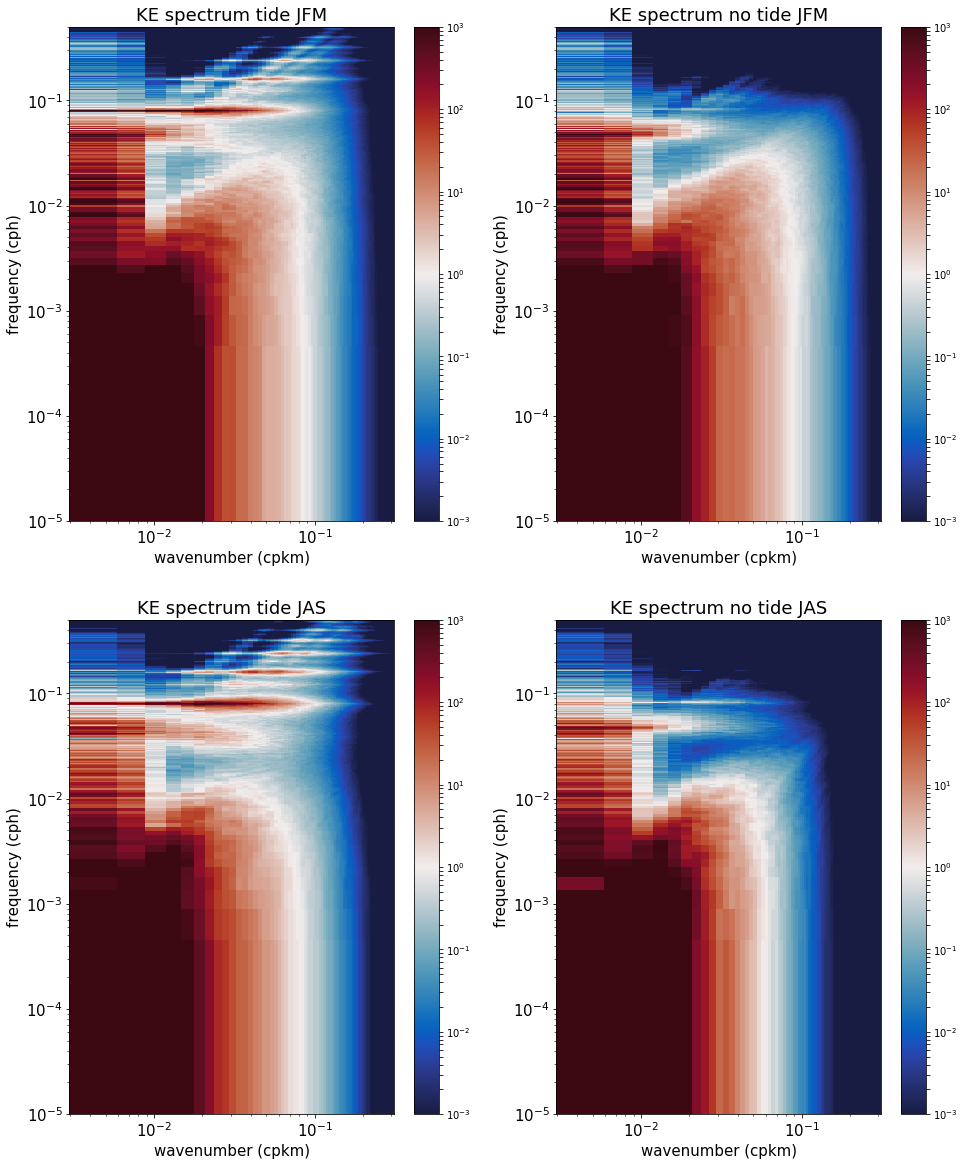

In [16]:
sec_to_hour = 3600.0
norm = LogNorm(vmin=0.001,vmax=1000)
cmap = cmocean.cm.balance

fig=plt.figure(figsize=(16,20))

ax = plt.subplot(221)
plt.pcolormesh(UtideJFM_wavenumber,sec_to_hour*UtideJFM_frequency,KEtideJFM_wavenum_freq_spectrum,norm=norm,cmap=cmap)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel('wavenumber (cpkm)',fontsize=15)
ax.set_ylabel('frequency (cph)',fontsize=15)
ax.set_xlim(UtideJFM_wavenumber.min(),UtideJFM_wavenumber.max())
ax.set_ylim(1E-5,5E-1)
ax.set_title('KE spectrum tide JFM',size=18)
ax.tick_params(labelsize=15)
plt.colorbar()

ax = plt.subplot(222)
plt.pcolormesh(UnotideJFM_wavenumber,sec_to_hour*UnotideJFM_frequency,KEnotideJFM_wavenum_freq_spectrum,norm=norm,cmap=cmap)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel('wavenumber (cpkm)',fontsize=15)
ax.set_ylabel('frequency (cph)',fontsize=15)
ax.set_xlim(UnotideJFM_wavenumber.min(),UnotideJFM_wavenumber.max())
ax.set_ylim(1E-5,5E-1)
ax.set_title('KE spectrum no tide JFM',size=18)
ax.tick_params(labelsize=15)
plt.colorbar()

ax = plt.subplot(223)
plt.pcolormesh(UtideJAS_wavenumber,sec_to_hour*UtideJAS_frequency,KEtideJAS_wavenum_freq_spectrum,norm=norm,cmap=cmap)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel('wavenumber (cpkm)',fontsize=15)
ax.set_ylabel('frequency (cph)',fontsize=15)
ax.set_xlim(UtideJAS_wavenumber.min(),UtideJAS_wavenumber.max())
ax.set_ylim(1E-5,5E-1)
ax.set_title('KE spectrum tide JAS',size=18)
ax.tick_params(labelsize=15)
plt.colorbar()

ax = plt.subplot(224)
plt.pcolormesh(UnotideJAS_wavenumber,sec_to_hour*UnotideJAS_frequency,KEnotideJAS_wavenum_freq_spectrum,norm=norm,cmap=cmap)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel('wavenumber (cpkm)',fontsize=15)
ax.set_ylabel('frequency (cph)',fontsize=15)
ax.set_xlim(UtideJAS_wavenumber.min(),UtideJAS_wavenumber.max())
ax.set_ylim(1E-5,5E-1)
ax.set_title('KE spectrum no tide JAS',size=18)
ax.tick_params(labelsize=15)
plt.colorbar()
